# Hierarchical models

Hierarchical (or multi-level) models can represent the similarities and differences between different groups or clusters in a data set. By setting up a prior distribution that allows each group to have its own parameter values, we can get a different expected outcome in each group but without treating the groups as completely independent. The model can simultaneously average over all the groups and allow each group to vary somewhat independently. This is useful for modeling scenarios where groups are similar but not exactly the same.

## Prep plan

* The McElreath reading is long today and should take ~1¼ hours.
* You will find the Python-translated code from the textbook here, as usual.
* There is 1 exercise at the end of the workbook.

## Required reading: Statistical rethinking

Read Chapter 13 up to the end of Section 13.2 of McElreath, R. (2020). _Statistical Rethinking, Second Edition_. Chapman and Hall/CRC Press.

* [Publisher’s page](https://www.routledge.com/Statistical-Rethinking-A-Bayesian-Course-with-Examples-in-R-and-STAN/McElreath/p/book/9780367139919) for buying the book if you want to
* [The whole book is available online on O’Reilly via the San Francisco Public Library](https://learning-oreilly-com.ezproxy.sfpl.org/library/view/statistical-rethinking-2nd/9780429639142/xhtml/21_Chapter13.xhtml). Log in with your library card number.

Outline:

* **The introduction (_Models with memory_) is required** (1,330 words). It introduces the concept of hierarchical/multi-level models and that they use data from previous groups/clusters/experiments to update the prior for future clusters automatically.
* **Section 13.1 (_Example: Multilevel tadpoles_) is required** (2,970 words). This section works through an example of hierarchical modeling in detail. Follow along and notice how introducing an extra layer of priors help the model to automatically combine all the data into an estimate for each cluster as well as an estimate for the overall behavior across different clusters.
* **Section 13.2 (_Varying effects and the underfitting/overfitting trade-off_) is required** (3,080 words). This section works through the same hierarchical model as in the previous section but this time focusing on simulating data (not the real data set) from the model. The point of this simulation is to better understand how the model generates data and therefore, to also better understand why a hierarchical model does a better job of fitting a data set with clusters.

## Code for Section 13.1

The next part of this workbook contains the R code provided in the McElreath book, translated to Python and PyMC. The code was modified and cleaned up slightly from [the source](https://github.com/pymc-devs/pymc-resources/blob/main/Rethinking_2/Chp_13.ipynb) (the `pymc-resources` repository). While reading the textbook, you need to follow along in this workbook and run the code as you go.

In [8]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as sts
from scipy.special import expit as logistic

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.ci_prob"] = 0.89
az.rcParams['stats.ic_scale'] = 'deviance'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

**Code 13.1**

In [9]:
df = pd.read_csv('https://course-resources.minerva.edu/uploaded_files/mu/00292851-6231/reedfrogs.csv')
print(df.shape)
df.head(100)

(48, 5)


,density,pred,size,surv,propsurv
0,10,no,big,9,0.900000
1,10,no,big,10,1.000000
2,10,no,big,7,0.700000
3,10,no,big,10,1.000000
4,10,no,small,9,0.900000
5,10,no,small,9,0.900000
6,10,no,small,10,1.000000
7,10,no,small,9,0.900000
8,10,pred,big,4,0.400000
9,10,pred,big,9,0.900000


**Code 13.2**

In [10]:
# make the tank cluster variable
tank = np.arange(df.shape[0])
n_tanks = df.shape[0]

# fit
with pm.Model() as m_13_1:
    a = pm.Normal('a', mu=0, sigma=1.5, shape=n_tanks)
    p = pm.math.invlogit(a[tank])
    S = pm.Binomial('S', n=df.density, p=p, observed=df.surv)

    trace_13_1 = pm.sample(chains=4)
    pm.compute_log_likelihood(trace_13_1)

az.summary(trace_13_1, round_to=2)

Output()

Output()

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],1.72,0.77,0.48,2.93,0.01,0.01,8257.00,2784.02,1.0
a[1],2.39,0.87,1.00,3.72,0.01,0.02,7233.01,2846.76,1.0
a[2],0.74,0.64,-0.28,1.73,0.01,0.01,9815.71,2960.37,1.0
a[3],2.41,0.90,0.96,3.75,0.01,0.02,7538.69,2942.02,1.0
a[4],1.71,0.78,0.47,2.92,0.01,0.02,8260.30,2716.47,1.0
a[5],1.71,0.77,0.46,2.89,0.01,0.02,8210.00,2686.09,1.0
a[6],2.44,0.94,0.83,3.81,0.01,0.02,7897.20,2627.09,1.0
a[7],1.73,0.78,0.55,3.00,0.01,0.02,6666.76,2539.41,1.0
a[8],-0.36,0.59,-1.29,0.59,0.01,0.01,10125.06,2853.06,1.0
a[9],1.72,0.78,0.45,2.94,0.01,0.01,7985.95,2745.74,1.0


**Code 13.3**

In [11]:
with pm.Model() as m_13_2:
    a_bar = pm.Normal('a_bar', mu=0, sigma=1.5)
    sigma = pm.Exponential('sigma', lam=1)
    a = pm.Normal('a', shape=n_tanks, mu=a_bar, sigma=sigma)
    p = pm.math.invlogit(a[tank])
    S = pm.Binomial('S', n=df.density, p=p, observed=df.surv)

    trace_13_2 = pm.sample(chains=4)
    pm.compute_log_likelihood(trace_13_2)

az.summary(trace_13_2, round_to=2)

Output()

Output()

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a[0],2.13,0.86,0.76,3.41,0.01,0.02,7079.51,2468.87,1.0
a[1],3.08,1.12,1.32,4.79,0.02,0.02,5304.16,2803.93,1.0
a[2],0.99,0.66,-0.04,2.06,0.01,0.01,7484.14,2847.62,1.0
a[3],3.06,1.07,1.32,4.64,0.01,0.02,5899.03,2504.03,1.0
a[4],2.15,0.90,0.78,3.57,0.01,0.02,4940.97,2390.63,1.0
a[5],2.14,0.89,0.72,3.43,0.01,0.02,7062.77,2613.83,1.0
a[6],3.06,1.08,1.41,4.71,0.02,0.02,5282.82,2756.00,1.0
a[7],2.12,0.88,0.73,3.47,0.01,0.02,7450.25,2783.62,1.0
a[8],-0.18,0.62,-1.14,0.82,0.01,0.01,6913.58,2662.18,1.0
a[9],2.15,0.90,0.67,3.48,0.01,0.02,7286.87,2646.29,1.0


**Code 13.4**

In [12]:
az.compare({'m13_1': trace_13_1, 'm13_2': trace_13_2}, ic='waic')

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
m13_2,0,199.504643,20.690946,0.000000,1.0,7.246550,0.000000,True,deviance
m13_1,1,214.498996,25.482139,14.994353,0.0,4.525789,3.778162,True,deviance


**Code 13.5**

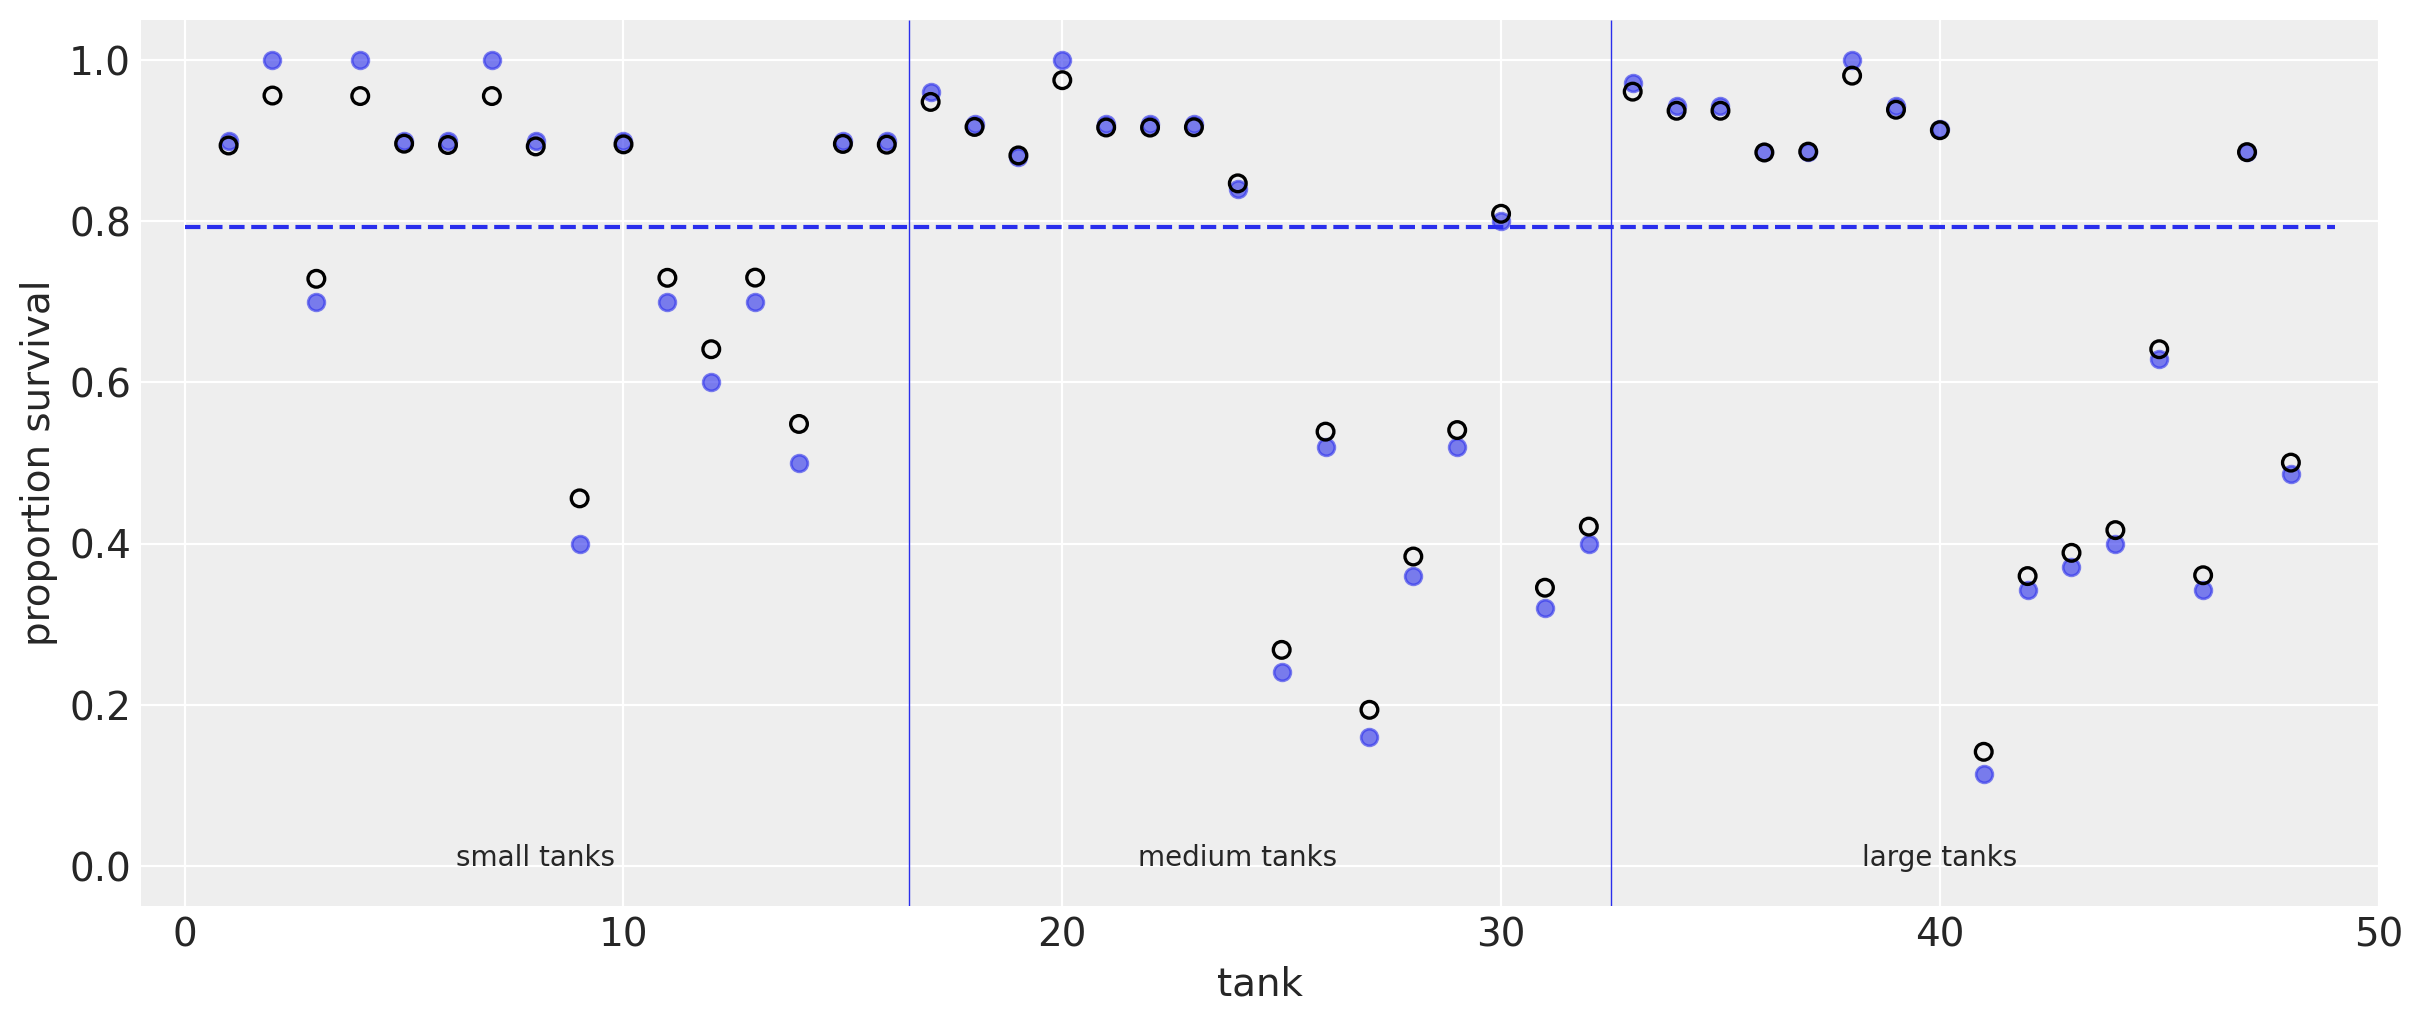

In [13]:
# compute mean intercept for each tank
# also transform to probability with logistic
propsurv_est = logistic(trace_13_2.posterior.a.mean(('chain', 'draw')))

_, ax = plt.subplots(1, 1, figsize=(12, 5))

# display raw proportions surviving in each tank
ax.scatter(np.arange(1, 49), df.propsurv, alpha=0.6)

# overlay posterior means
ax.scatter(np.arange(1, 49), propsurv_est, facecolors='none', edgecolors='k', lw=1.2)

# mark posterior mean probability across tanks
ax.hlines(logistic(trace_13_2.posterior.a_bar.mean(('chain', 'draw'))), 0, 49, linestyles='--')

# draw vertical dividers between tank densities
ax.vlines([16.5, 32.5], -0.05, 1.05, lw=0.5)
ax.text(8, 0, "small tanks", horizontalalignment="center")
ax.text(16 + 8, 0, "medium tanks", horizontalalignment="center")
ax.text(32 + 8, 0, "large tanks", horizontalalignment="center")

ax.set_xlabel("tank", fontsize=14)
ax.set_ylabel("proportion survival", fontsize=14)
ax.set_xlim(-1, 50)
ax.set_ylim(-0.05, 1.05);

**Code 13.6**

Note: For the second plot below, the plot you see here is much smoother than the plot in the textbook. For some reason, the reduced the smoothing factor of the density estimate below the default value (by using `adj=0.1` in the textbook, making the smoothing interval 10 times narrower than the default). We don't do that here, in order to provide a better density plot.

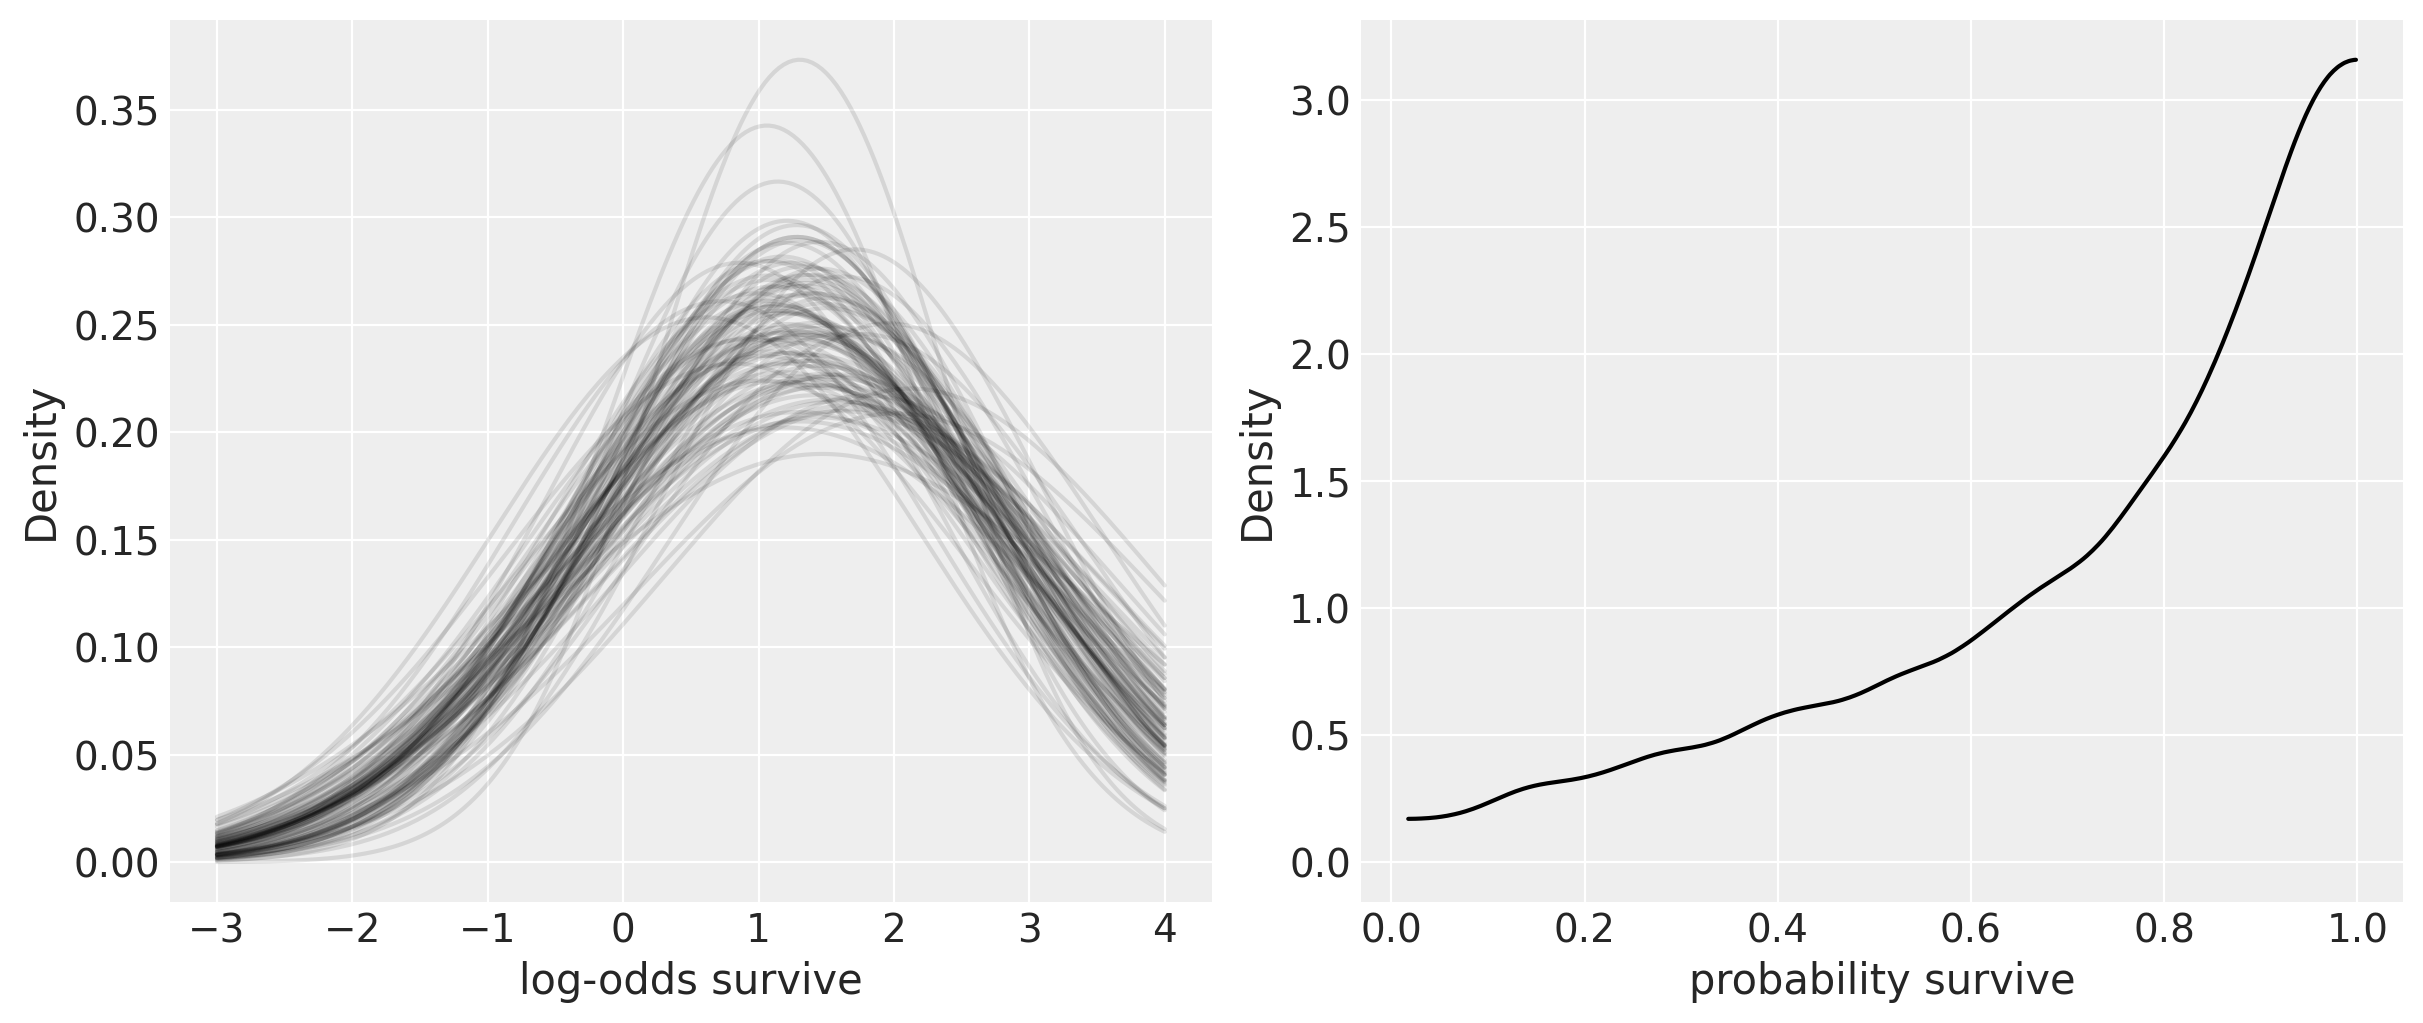

In [14]:
_, ax = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# show first 100 populations in the posterior
xrange = np.linspace(-3, 4, 200)
postcurve = [
    sts.norm.pdf(xrange, loc=trace_13_2.posterior.a_bar[0, i], scale=trace_13_2.posterior.sigma[(0, i)])
    for i in range(100)]
ax[0].plot(xrange, np.asarray(postcurve).T, alpha=0.1, color="k")
ax[0].set_xlabel("log-odds survive")
ax[0].set_ylabel("Density")

# sample 8000 imaginary tanks from the posterior distribution
sim_tanks = np.random.normal(loc=trace_13_2.posterior.a_bar, scale=trace_13_2.posterior.sigma)

# transform to probability and visualize
az.plot_kde(logistic(sim_tanks), ax=ax[1], plot_kwargs={"color": "k"})
ax[1].set_xlabel("probability survive")
ax[1].set_ylabel("Density");

## Code for Section 13.2

**Code 13.7**

In [15]:
a_bar, sigma, nponds = 1.5, 1.5, 60
Ni = np.repeat([5, 10, 25, 35], 15)

**Code 13.8**

In [16]:
# Create a new NumPy random number generator with a specific random seed so
# we can create the similar data to what is in the textbook. R and Python don't
# have exactly the same random number generator implementations so getting
# exactly the same data is tricky (but possible if you use the rpy library).
rng = np.random.default_rng(seed=123)
a_pond = rng.normal(loc=a_bar, scale=sigma, size=nponds)

**Code 13.9**

In [17]:
dsim = pd.DataFrame(dict(pond=np.arange(nponds), Ni=Ni, true_a=a_pond))
dsim.head()

,pond,Ni,true_a
0,0,5,0.016318
1,1,5,0.948320
2,2,5,3.431888
3,3,5,1.790962
4,4,5,2.880346


**Code 13.10**

Data types related. Python is dynamically-typed so not relevant.

**Code 13.11**

In [18]:
dsim["Si"] = np.random.binomial(dsim["Ni"], logistic(dsim["true_a"]))

**Code 13.12**

In [19]:
dsim["p_nopool"] = dsim.Si / dsim.Ni

**Code 13.13**

In [20]:
with pm.Model() as m_13_3:
    a_bar = pm.Normal('a_bar', mu=0, sigma=1.5)
    sigma = pm.Exponential('sigma', lam=1)
    a_pond = pm.Normal('a_pond', shape=nponds, mu=a_bar, sigma=sigma)
    p = pm.math.invlogit(a_pond[dsim.pond.values])
    Si = pm.Binomial('Si', n=dsim.Ni.values, p=p, observed=dsim.Si)

    trace_13_3 = pm.sample(chains=4)

Output()

**Code 13.14**

In [21]:
az.summary(trace_13_3, var_names=['a_bar', 'sigma'], round_to=2)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_bar,1.58,0.23,1.21,1.95,0.00,0.0,2846.05,2209.44,1.0
sigma,1.52,0.23,1.15,1.88,0.01,0.0,1161.63,1701.65,1.0


**Code 13.15**

In [22]:
dsim['p_partpool'] = logistic(trace_13_3.posterior.a_pond.mean(('chain', 'draw')))

**Code 13.16**

In [23]:
dsim['p_true'] = logistic(dsim['true_a'].values)

**Code 13.17**

In [24]:
nopool_error = np.abs(dsim.p_nopool - dsim.p_true)
partpool_error = np.abs(dsim.p_partpool - dsim.p_true)

**Code 13.18 and 13.19**

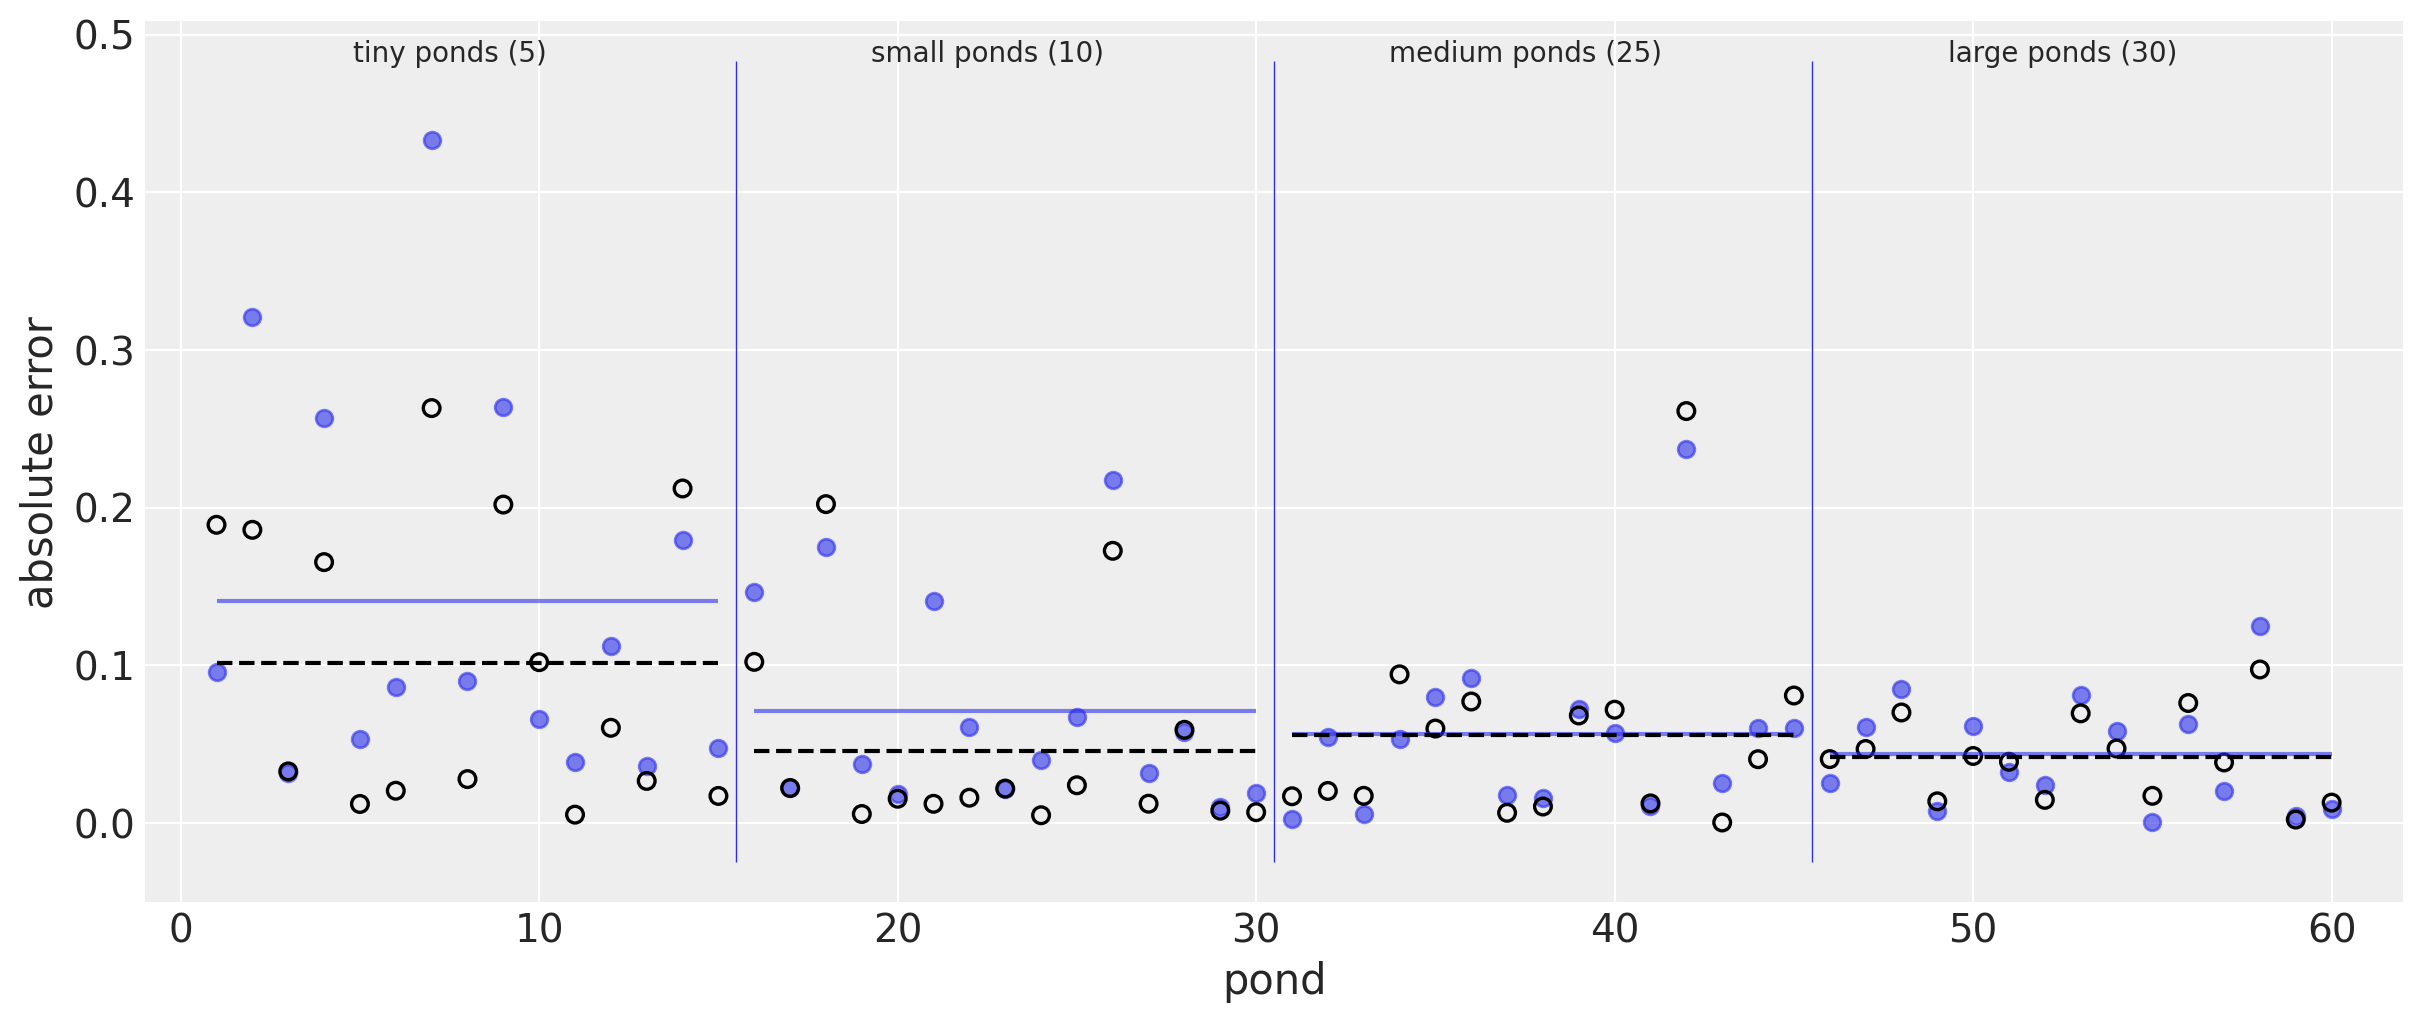

In [25]:
_, ax = plt.subplots(1, 1, figsize=(12, 5))
xrange = np.arange(60)
xrange_ = xrange.reshape((4, 15))

ax.scatter(xrange + 1, nopool_error, alpha=0.6)
ax.scatter(xrange + 1, partpool_error, facecolors="none", edgecolors="k", lw=1.2)
ax.vlines(xrange_[1:, 0] + 0.5, -0.025, max(nopool_error) + 0.05, lw=0.5)

textall = [
    "tiny ponds (5)",
    "small ponds (10)",
    "medium ponds (25)",
    "large ponds (30)"]
for isem in range(4):
    ax.hlines(
        nopool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="C0",
        alpha=0.6)
    ax.hlines(
        partpool_error[xrange_[isem, :]].mean(),
        xrange_[isem, 0] + 1,
        xrange_[isem, -1] + 1,
        color="k",
        linestyles="--")
    ax.text(
        xrange_[isem, 7] + 0.5,
        max(nopool_error) + 0.05,
        textall[isem],
        horizontalalignment="center")

ax.set_xlabel("pond")
ax.set_ylabel("absolute error")
ax.set_xlim(-1, 62);

**Code 13.20**

This part is Stan related. To do the same in PyMC (i.e., avoid compiling the same model twice), we set up the input data with `pm.Data`. We have already seen examples of this in previous classes and you will see more here.

## Exercises

Earlier in this course, we looked at the medical trial data set below and modeled it using a simple Binomial likelihood function.

Modify this model to be hierarchical. Give each study its own $p_i$ variable rather than using the same $p$ for all studies. Place an appropriate hierarchical prior distribution over the $p_i$ variables. Compute the posterior distribution and visualize the posterior distributions over the $p_i$ variables.

Bring your results to class for discussion.

### Data

| Study          | TG improved      | TG not improved   | CG improved    | CG not improved   |
|:-------------- | --------:| ------:| ------:| ------:|
| Di Rienzo 2014 | 20       | 3      | 9      | 6      |
| Galli 1994     | 10       | 6      | 11     | 7      |
| Kaufman 1974   | 13       | 3      | 4      | 6      |
| Qin 2014       | 35       | 10     | 21     | 18     |
| Sanchez 2012   | 22       | 9      | 12     | 17     |
| Silny 2006     | 7        | 3      | 0      | 10     |
| **Totals**     | **107**  | **34** | **57** | **64** |

TG = Treatment group. CG = Control group. [[Source](https://www.cochranelibrary.com/cdsr/doi/10.1002/14651858.CD008774.pub2/full)]

Output()

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_bar,2.859,1.375,0.810,4.882,0.021,0.025,4182.0,2664.0,1.00
beta_bar,1.260,0.578,0.361,2.070,0.010,0.012,3682.0,2753.0,1.00
p[0],0.843,0.069,0.743,0.950,0.001,0.001,5556.0,2521.0,1.00
p[1],0.638,0.104,0.476,0.807,0.001,0.002,5709.0,2801.0,1.00
p[2],0.787,0.092,0.639,0.927,0.001,0.002,5306.0,2333.0,1.01
p[3],0.770,0.061,0.676,0.869,0.001,0.001,7239.0,2922.0,1.00
p[4],0.708,0.075,0.593,0.828,0.001,0.001,5464.0,2873.0,1.00
p[5],0.697,0.123,0.518,0.900,0.002,0.002,5951.0,2657.0,1.00


Output()

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_bar,1.308,0.743,0.245,2.264,0.016,0.019,1738.0,1521.0,1.0
beta_bar,1.735,0.921,0.398,2.952,0.018,0.020,2546.0,2627.0,1.0
p[0],0.570,0.116,0.390,0.763,0.002,0.002,5602.0,2749.0,1.0
p[1],0.588,0.108,0.411,0.752,0.001,0.002,5633.0,2643.0,1.0
p[2],0.406,0.133,0.187,0.616,0.002,0.002,4330.0,2710.0,1.0
p[3],0.530,0.076,0.405,0.647,0.001,0.001,4934.0,2813.0,1.0
p[4],0.413,0.087,0.283,0.559,0.001,0.001,5864.0,2676.0,1.0
p[5],0.098,0.089,0.000,0.214,0.002,0.001,1797.0,892.0,1.0


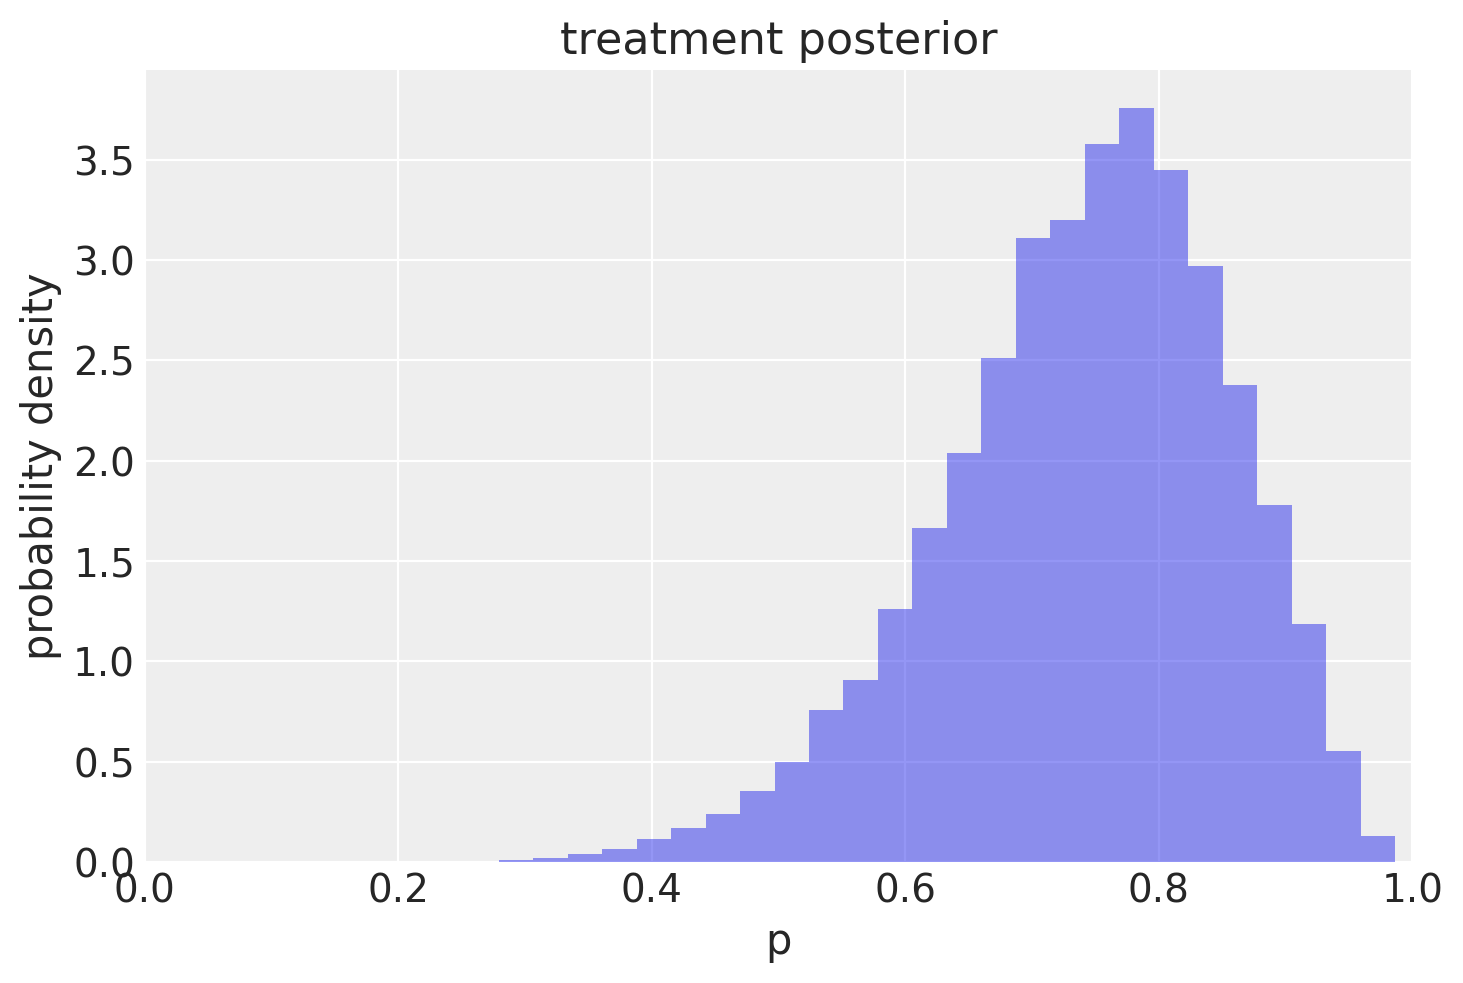

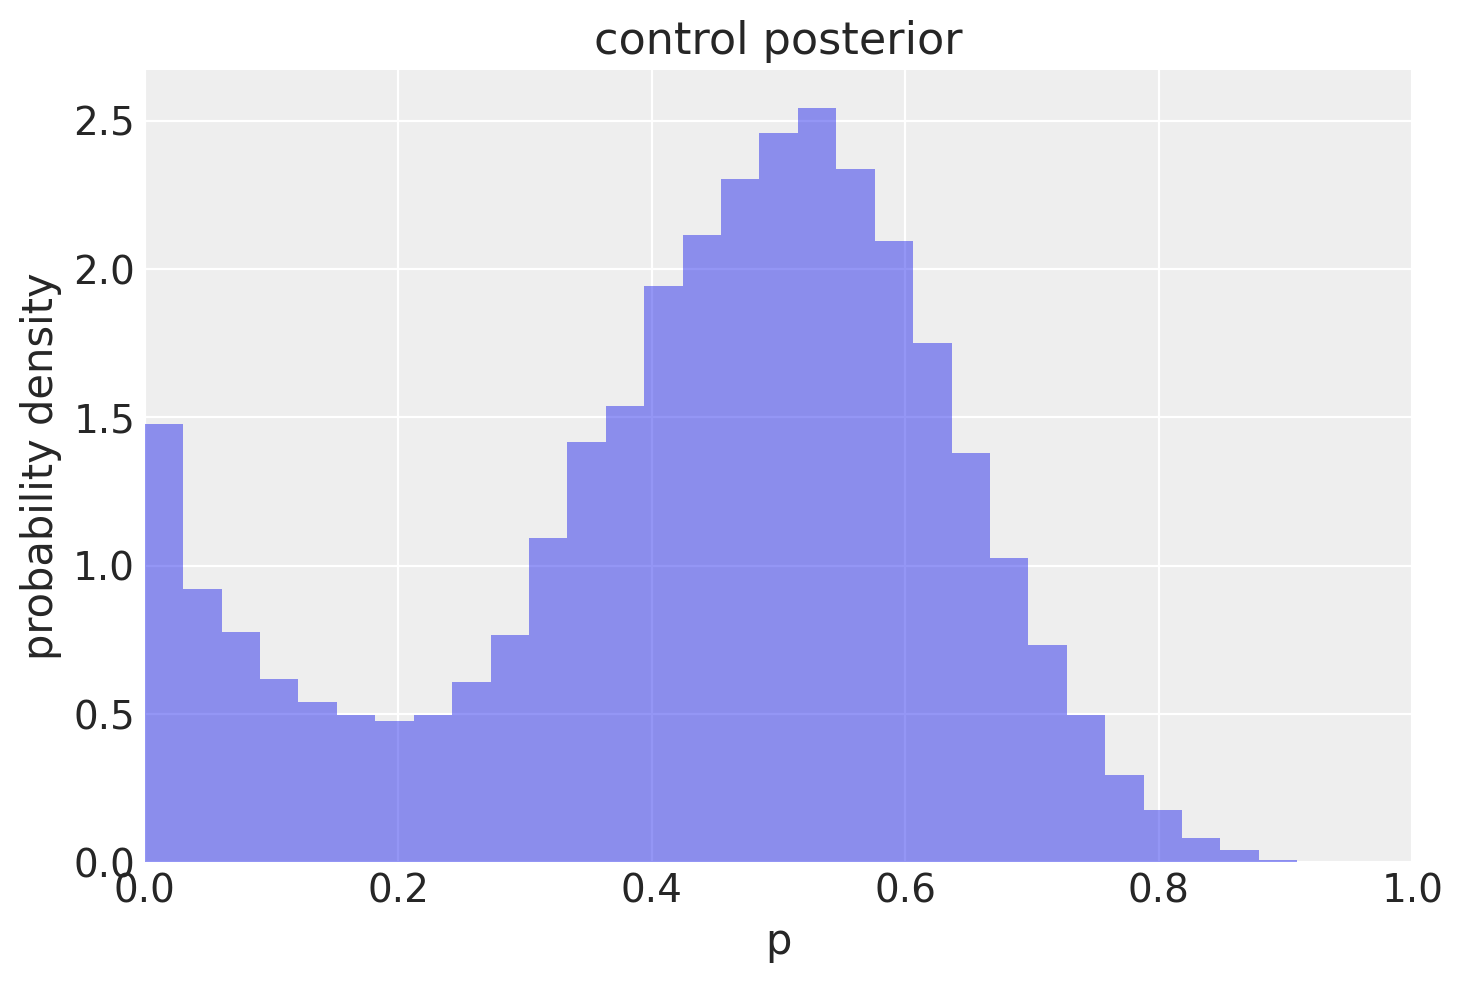

In [26]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

data = {
    'num_studies': 6,
    'treatment': {
        'patients': np.array([23, 16, 16, 45, 31, 10]),
        'improved': np.array([20, 10, 13, 35, 22, 7])},
    'control': {
        'patients': np.array([15, 18, 10, 39, 29, 10]),
        'improved': np.array([9, 11, 4, 21, 12, 0])}}

group = 'treatment'

'''
with pm.Model() as m_13_2:
    a_bar = pm.Normal('a_bar', mu=0, sigma=1.5)
    sigma = pm.Exponential('sigma', lam=1)
    a = pm.Normal('a', shape=n_tanks, mu=a_bar, sigma=sigma)
    p = pm.math.invlogit(a[tank])
    S = pm.Binomial('S', n=df.density, p=p, observed=df.surv)

    trace_13_2 = pm.sample(chains=4)
    pm.compute_log_likelihood(trace_13_2)

az.summary(trace_13_2, round_to=2)
'''

with pm.Model() as model:
    # Data
    data_n = pm.Data('data_n', data[group]['patients'])
    data_x = pm.Data('data_x', data[group]['improved'])

    # hyperpriors
    alpha_bar = pm.Exponential("alpha_bar", lam=1)
    beta_bar = pm.Exponential("beta_bar", lam=1)

    # Prior
    p = pm.Beta('p', shape=6, alpha=alpha_bar, beta=beta_bar)


    # Likelihood
    pm.Binomial('x', n=data_n, p=p, observed=data_x)

# Generate posterior samples
inference = {}  # store the results here
for group in ['treatment', 'control']:
    with model:
        pm.set_data({
            'data_n': data[group]['patients'],
            'data_x': data[group]['improved']})
        inference[group] = pm.sample(chains=4)
        display(az.summary(inference[group]))

# Plot posterior samples
for group in ['treatment', 'control']:
    plt.figure()
    plt.title(group + ' posterior')
    plt.hist(
        inference[group].posterior.p.values.flat, bins=30,
        density=True, alpha=0.5)
    plt.xlabel('p')
    plt.ylabel('probability density')
    plt.xlim(0, 1)

plt.show()

In [ ]:
# YOUR WORK GOES HERE; PASTE YOUR CODE INTO FORUM